**Creando un modelo regresión lineal con Scikit-Learn.**  

Actividad
1. Investigar y seleccionar un caso en la vida real, en el cual sea posible aplicar un modelo de regresión lineal. Fundamente la elección.  

El caso seleccionado fue el siguiente: 

Engineering Student Journey
Student Academic and Placement Dataset

Este conjunto de datos proporciona información detallada sobre el rendimiento académico, las habilidades, las prácticas profesionales y los resultados de las colocaciones de los estudiantes de ingeniería. Abarca a estudiantes de ramas como CSE, ECE, MECH y más, incluyendo su promedio semestral, su participación en clubes y sus habilidades técnicas.
https://www.kaggle.com/datasets/rakeshkapilavai/engineering-student-journey  

2. Cree o seleccione un datasets sobre el caso elegido. En el caso de descargar, realice la limpieza correspondiente. (recomendado:  
https://www.kaggle.com ). El datasets debe tener minimo 1000 filas. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Cargamos el Data Set
df = pd.read_csv("students.csv")

#Mostraremos las primeras 10 Filas.
print(df.head(10))

                             Student ID                 Name   Age  Gender  \
0  b37412a3-fa5c-40ca-b087-7109a47482d7                 Amit  21.0    Male   
1  65001423-faeb-4d19-a550-8ea26133a34d         Tina Ballard  19.0    Male   
2  228aaf1d-8710-4c8d-bfec-001b0df01f34                Meena  19.0  Female   
3  1aa67474-e200-4157-ad54-c95aaa4d52a8  Christopher Morales  23.0    Male   
4  5122db4a-14c8-44d7-b2f4-e869f69d3dd7            Siddharth  20.0    Male   
5  28dd6ff3-6391-4421-ba38-3c3164b96252            Siddharth  19.0    Male   
6  5c375254-a8fc-4690-a9b1-c4a1da221b85        Alicia Dillon  18.0  Female   
7  1090fccc-de58-401b-9cb7-b64f927e5e08                Rahul  23.0    Male   
8  3f87e362-cf8d-446a-bc2c-bb0ddd334cc7    Richard Rodriguez  18.0    Male   
9  db0f4094-ae51-472d-b7a5-5c76fa4e4399                 Anil  18.0    Male   

  Branch  Average GPA  Backlogs  Attendance (%)  \
0   MECH         6.99       0.0           70.45   
1    ECE         6.46       0.0        

In [4]:
# Visualizamos las columnas y los tipos de datos
print("\nColumnas y tipos:")
print(df.info())


Columnas y tipos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         1999 non-null   object 
 1   Name               2000 non-null   object 
 2   Age                1999 non-null   float64
 3   Gender             1999 non-null   object 
 4   Branch             1999 non-null   object 
 5   Average GPA        1999 non-null   float64
 6   Backlogs           1999 non-null   float64
 7   Attendance (%)     1999 non-null   float64
 8   Clubs              1999 non-null   object 
 9   Skills             1999 non-null   object 
 10  Internship Done    1999 non-null   object 
 11  Internship Domain  982 non-null    object 
 12  Placement Status   1999 non-null   object 
 13  Placement Domain   1032 non-null   object 
 14  CTC (LPA)          1999 non-null   float64
 15  Alumni Path        1032 non-null   object 
 16  Sem1 

In [5]:
# Realizamos la limpieza y eliminamos las columnas no numéricas o irrelevantes para la regresión
df = df.drop(['Name', 'Email', 'Contact'], axis=1, errors='ignore')


In [6]:
# Revisamos los valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminamos las filas con valores faltantes
df.dropna(inplace=True)

# Confirmar cantidad final de filas
print("\nFilas después de limpiar:", len(df))


Valores nulos por columna:
Student ID              1
Age                     1
Gender                  1
Branch                  1
Average GPA             1
Backlogs                1
Attendance (%)          1
Clubs                   1
Skills                  1
Internship Done         1
Internship Domain    1018
Placement Status        1
Placement Domain      968
CTC (LPA)               1
Alumni Path           968
Sem1 GPA                1
Sem2 GPA                1
Sem3 GPA                1
Sem4 GPA                1
Sem5 GPA                1
Sem6 GPA                1
Sem7 GPA                1
Sem8 GPA                1
dtype: int64

Filas después de limpiar: 481


In [ ]:
# Volvemos a verificar que se haya hecho la limpieza correcta de los datos.
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Student ID           0
Age                  0
Gender               0
Branch               0
Average GPA          0
Backlogs             0
Attendance (%)       0
Clubs                0
Skills               0
Internship Done      0
Internship Domain    0
Placement Status     0
Placement Domain     0
CTC (LPA)            0
Alumni Path          0
Sem1 GPA             0
Sem2 GPA             0
Sem3 GPA             0
Sem4 GPA             0
Sem5 GPA             0
Sem6 GPA             0
Sem7 GPA             0
Sem8 GPA             0
dtype: int64


3. Cree y entrene un modelo de regresión lineal con la librería Scikit Learn.

In [11]:
df = pd.read_csv("students.csv")
print(df.columns)
print(df.head(8))

Index(['Student ID', 'Name', 'Age', 'Gender', 'Branch', 'Average GPA',
       'Backlogs', 'Attendance (%)', 'Clubs', 'Skills', 'Internship Done',
       'Internship Domain', 'Placement Status', 'Placement Domain',
       'CTC (LPA)', 'Alumni Path', 'Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA',
       'Sem4 GPA', 'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA'],
      dtype='object')
                             Student ID                 Name   Age  Gender  \
0  b37412a3-fa5c-40ca-b087-7109a47482d7                 Amit  21.0    Male   
1  65001423-faeb-4d19-a550-8ea26133a34d         Tina Ballard  19.0    Male   
2  228aaf1d-8710-4c8d-bfec-001b0df01f34                Meena  19.0  Female   
3  1aa67474-e200-4157-ad54-c95aaa4d52a8  Christopher Morales  23.0    Male   
4  5122db4a-14c8-44d7-b2f4-e869f69d3dd7            Siddharth  20.0    Male   
5  28dd6ff3-6391-4421-ba38-3c3164b96252            Siddharth  19.0    Male   
6  5c375254-a8fc-4690-a9b1-c4a1da221b85        Alicia Dillon  18.0  Female   
7

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar y limpiar el dataset
df = pd.read_csv("students.csv")
df = df.drop(['Name', 'Email', 'Contact'], axis=1, errors='ignore')
df.dropna(inplace=True)

# Variables predictoras (X) y variable objetivo (y)
X = df[['Age', 'Attendance (%)', 'Backlogs']]
y = df['Average GPA']

# Dividir en datos de entrenamiento y prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Mostrar coeficientes y resultados
print("Coeficientes del modelo:")
for col, coef in zip(X.columns, modelo.coef_):
    print(f"{col}: {coef:.4f}")
print(f"\nIntercepto: {modelo.intercept_:.4f}")



Coeficientes del modelo:
Age: -0.0127
Attendance (%): -0.0023
Backlogs: -0.0053

Intercepto: 7.4523


4. Realice predicciones con el modelo.  

MSE (Mean Squared Error): te dice cuánto se equivocó el modelo en promedio (cuanto más bajo, mejor).

R² (R-squared): mide qué tan bien explica el modelo la variabilidad de los datos (más cerca de 1 = mejor).

In [21]:
# Realizar predicciones sobre el conjunto
y_pred = modelo.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación R²: {r2:.4f}")

# Mostrar las primeras 5 predicciones junto con los valores reales
resultado = pd.DataFrame({'GPA Real': y_test.values, 'GPA Predicho': y_pred})
print("\nComparación de valores reales y predichos:")
print(resultado.head())



Error cuadrático medio (MSE): 0.0992
Coeficiente de determinación R²: -0.0571

Comparación de valores reales y predichos:
   GPA Real  GPA Predicho
0      6.57      7.056872
1      6.97      6.971437
2      7.53      7.029929
3      7.17      7.077881
4      7.20      7.000231


5. Cree un gráfico de visualización con Matplotlib que compare los datos de entrenamiento con los resultados predecidos.

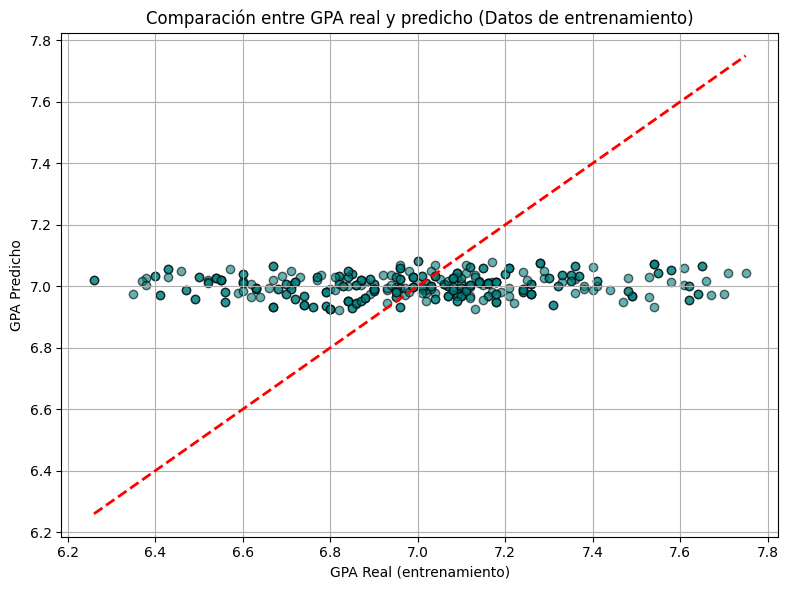

In [27]:
# Creamos el gráfico de dispersión
import matplotlib.pyplot as plt

# Predecir sobre los datos de entrenamiento
y_train_pred = modelo.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, color='teal', edgecolors='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("GPA Real (entrenamiento)")
plt.ylabel("GPA Predicho")
plt.title("Comparación entre GPA real y predicho (Datos de entrenamiento)")
plt.grid(True)
plt.tight_layout()
plt.show()